In [1]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
import tensorflow as tf
import cv2
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import math
from skimage.filters.rank import equalize
from skimage.morphology import disk

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import glob, os
os.chdir("/content/drive/MyDrive/EECS-6893-Project/CASIA-test")
count = 0 
for filename in glob.glob("*.jpg"):
  person_name = "/content/drive/MyDrive/EECS-6893-Project/CASIA-test" + "/" + filename
  image = cv2.imread(person_name)
  # cv2.imwrite("/content/drive/MyDrive/EECS-6893-Project/CASIA-clean/" + filename, image)
  # image_path = "/content/drive/MyDrive/EECS-6893-Project/CASIA-clean" + "/" + filename
  # image = Image.open(image_path)
  # print("Image size: ", np.asarray(image).shape)
  # print(count)
  # count = count + 1

In [5]:

img_org_gray= cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
img_histEqualization= cv2.equalizeHist(img_org_gray) ## Enhancement


In [6]:
_,img_binary= cv2.threshold(img_org_gray,70,255,cv2.THRESH_BINARY) # Binary image 

# edges = cv2.Canny(img_binary,100,150,apertureSize=3)

center_pupil = cv2.HoughCircles(img_binary, cv2.HOUGH_GRADIENT,1,250,
                           param1=80,param2=10,minRadius=30,
                           maxRadius=70)
center_pupil = np.uint16(np.around(center_pupil))
draw = image.copy()
for i in center_pupil[0,:]:
    print(i,i[0],i[1],i[2])
    draw = cv2.circle(draw,(i[0],i[1]),i[2],(255,0,0),2)
    draw = cv2.circle(draw,(i[0],i[1]),2,(255,0,0),3)

(x1, y1) = center_pupil[0][0][0], center_pupil[0][0][1]

[146 142  45] 146 142 45


In [7]:
circles = cv2.HoughCircles(img_histEqualization, cv2.HOUGH_GRADIENT,1,250,
                           param1=80,param2=30,minRadius=50,
                           maxRadius=100)
circles = np.uint16(np.around(circles))
draw_iris = image.copy()
for i in circles[0,:]:
    print(i,i[0],i[1],i[2])
    draw_iris = cv2.circle(draw_iris,(i[0],i[1]),i[2],(255,0,0),2)
    draw_iris = cv2.circle(draw_iris,(i[0],i[1]),2,(255,0,0),3)
draw_shift = draw.copy()    
for i in circles[0,:]:       
    print(i,i[0],i[1],i[2]) 
    mask = np.zeros_like(image)
    mask = cv2.circle(mask, (x1,y1), i[2], (255,255,255), -1)
    draw_shift = cv2.circle(draw_shift,(x1,y1),i[2],(255,0,0),2)
    draw_shift = cv2.circle(draw_shift,(x1,y1),2,(255,0,0),3)  
    draw_mask = cv2.bitwise_and(draw_shift, mask)


[146 110  99] 146 110 99
[146 110  99] 146 110 99


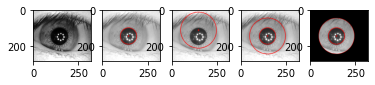

In [8]:

plt.subplot(1,5,1)
plt.imshow(img_histEqualization, cmap='gray') 
plt.subplot(1,5,2)          
plt.imshow(draw)                              
plt.subplot(1,5,3) 
plt.imshow(draw_iris)                        
plt.subplot(1,5,4)
plt.imshow(draw_shift)         
plt.subplot(1,5,5)
plt.imshow(draw_mask)                


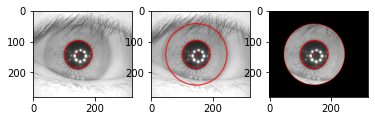

In [9]:
plt.subplot(1,3,1)
plt.imshow(draw)
plt.subplot(1,3,2)
plt.imshow(draw_shift)
plt.subplot(1,3,3)
plt.imshow(draw_mask)